# **Trabalho 3**

Todos os anos centenas de filmes são lançados no mundo todo por diversas produtoras que contam com orçamentos de todos os tamanhos, gerando uma indústria bilhonária. Nesse contexto, você como cientista da computação recém formado foi contratado para monitorar em tempo real as impressões da platéia por meio de posts em redes sociais.

Basicamente o seu trabalho é monitorar as impressões positivas e negativas de um determinado filme, nos últimos dias (exemplo: 30 dias). Você poderá fazer isso lendo todas as postagens e interpretando cada uma como positiva ou negativa ou **usando** o conhecimento adquirido durante a graduação e, portanto, automatizar essa tarefa. **Faça a escolha correta** e automatize essa tarefa. 

Para auxiliar nessa tarefa, considere o dataset anterior e os conceitos estudados em sala de aula.

Escolha três filmes* já lançados de sua preferência para conduzir essa análise. Lembre-se que seu trabalho é apresentar uma forma automática de entender impressões positivas e negativas sobre os filmes escolhidos a partir de posts em uma rede social (no caso, o Twitter).

O que você precisa apresentar é:

+ uma análise sobre os posts referentes aos filmes escolhidos (isto é, o notebbok contendo o código e comentado. Seja organizado). Por exemplo, espera-se que no mínimo você apresente um gráfico de impressões positivas e negativas sobre cada filme escolhido nos últimos **n** dias.

+ fazer um vídeo de no máximo 5 minutos explicando as tuas principais estratégias.

**Data de entrega:** 10 de agosto de 2022

*Seja prudente na escolha dos filmes, de modo que haja comentários suficientes para a sua análise.

## Collecting tweets

In [3]:
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import pandas as pd
import tweepy
import os
import re

plt.style.use('fivethirtyeight')
load_dotenv()


True

### Steps

 Para fazer a coleta você precisa ter uma conta de desenvolvedor do Twitter. Obter a conta de desenvolvedor do Twitter pode levar um ou dois dias (para criar sua conta [clique aqui](https://developer.twitter.com/en))

Neste [link](https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795) tem um tutorial de como fazer isso.

### Grabbing some tweets
Os próximos trechos de código foram obtidos deste [link](https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795)

### Setup account

In [80]:
# log=pd.read_csv('colocar_suas_credenciais')
consumer_key=os.getenv('API_KEY')
consumer_secret=os.environ['API_SECRET']
access_token=os.environ['ACCESS_TOKEN']
access_token_secret=os.environ['ACCESS_TOKEN_SECRET']
bearer_token=os.environ['BEARER_TOKEN']


In [81]:
authenticate=tweepy.OAuthHandler(consumer_key,consumer_secret)
## set access token and access token secret
authenticate.set_access_token(access_token, access_token_secret)
## create API object while passing in authentication information
api=tweepy.API(authenticate, wait_on_rate_limit=True)


In [82]:
client = tweepy.Client(
    consumer_key=consumer_key, consumer_secret=consumer_secret,
    access_token=access_token, access_token_secret=access_token_secret,
    wait_on_rate_limit=True
)

print(api.verify_credentials().screen_name)


MaVaiQueDaCerto


In [83]:
query = 'Thor Love and Thunder exclude:retweets'
# query = 'minions exclude:retweets'
# query = 'The Black Phone exclude:retweets'

# tweets to be collected
tweet_count = 35000

tweets = tweepy.Cursor(api.search_tweets, q=query,
                      result_type="recent", count=tweet_count, lang="en").items(tweet_count)
list_tweets = [tweet for tweet in tweets]

# load df from file if it exists
df = pd.DataFrame()
try:
	df = pd.read_csv('./data/tweets.csv')
	print('Loaded tweets from file')
except:
	print('Could not load file')

for i, tweet in enumerate(list_tweets):
	# tweet to dict
	tweet_dict = tweet._json
	tweet_dict['movie'] = query
	curr_df = pd.DataFrame([tweet_dict])

	df = pd.concat([df, curr_df], axis=0)

display(df.head())


Could not load file


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Wed Aug 03 10:40:28 +0000 2022,1554779224976019456,1554779224976019456,Why are people hating on Thor Love and Thunder...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
0,Wed Aug 03 10:37:20 +0000 2022,1554778435582496768,1554778435582496768,@CultureCrave Thor love and thunder this movie...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1554777759779409926,1554777759779409926,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
0,Wed Aug 03 10:34:18 +0000 2022,1554777674706452481,1554777674706452481,@CultureCrave Spiderman: No Way Home \nMultive...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1554598122361278464,1554598122361278464,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
0,Wed Aug 03 10:33:54 +0000 2022,1554777574408077313,1554777574408077313,@playboidarti29 @juicencigs @bharadwaj_abeer @...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1554673060267139072,1554673060267139072,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
0,Wed Aug 03 10:32:08 +0000 2022,1554777128188760064,1554777128188760064,No Way Hone\nMultiverse of Madness\nShang Chi\...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,None,...,0,2,False,False,False,en,1.554598e+18,1554598122361278464,{'created_at': 'Tue Aug 02 22:40:50 +0000 2022...,NaN


In [84]:
# remove id duplicates
df = df.drop_duplicates(subset='id', keep='first')

# save df to csv
df.to_csv('./data/tweets.csv')


## Load Data

In [4]:
df = pd.read_csv('./data/tweets.csv')

display(df.head())


,Unnamed: 0,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,0,Wed Aug 03 10:40:28 +0000 2022,1554779224976019456,1554779224976019456,Why are people hating on Thor Love and Thunder...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
1,0,Wed Aug 03 10:37:20 +0000 2022,1554778435582496768,1554778435582496768,@CultureCrave Thor love and thunder this movie...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.554778e+18,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
2,0,Wed Aug 03 10:34:18 +0000 2022,1554777674706452481,1554777674706452481,@CultureCrave Spiderman: No Way Home \nMultive...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.554598e+18,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
3,0,Wed Aug 03 10:33:54 +0000 2022,1554777574408077313,1554777574408077313,@playboidarti29 @juicencigs @bharadwaj_abeer @...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.554673e+18,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
4,0,Wed Aug 03 10:32:08 +0000 2022,1554777128188760064,1554777128188760064,No Way Hone\nMultiverse of Madness\nShang Chi\...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,2,False,False,False,en,1.554598e+18,1.554598e+18,{'created_at': 'Tue Aug 02 22:40:50 +0000 2022...,NaN


## Preprocessing

In [5]:
# clean tweets
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
df['text'] = df['text'].apply((lambda x: re.sub('\s+', ' ', x)))

display(df.head())


,Unnamed: 0,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,0,Wed Aug 03 10:40:28 +0000 2022,1554779224976019456,1554779224976019456,why are people hating on thor love and thunder...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
1,0,Wed Aug 03 10:37:20 +0000 2022,1554778435582496768,1554778435582496768,culturecrave thor love and thunder this movie ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.554778e+18,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
2,0,Wed Aug 03 10:34:18 +0000 2022,1554777674706452481,1554777674706452481,culturecrave spiderman no way home multiverse ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.554598e+18,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
3,0,Wed Aug 03 10:33:54 +0000 2022,1554777574408077313,1554777574408077313,playboidarti29 juicencigs bharadwaj_abeer nois...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.554673e+18,...,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
4,0,Wed Aug 03 10:32:08 +0000 2022,1554777128188760064,1554777128188760064,no way hone multiverse of madness shang chi et...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,2,False,False,False,en,1.554598e+18,1.554598e+18,{'created_at': 'Tue Aug 02 22:40:50 +0000 2022...,NaN


## Analysis

### Wordcloud

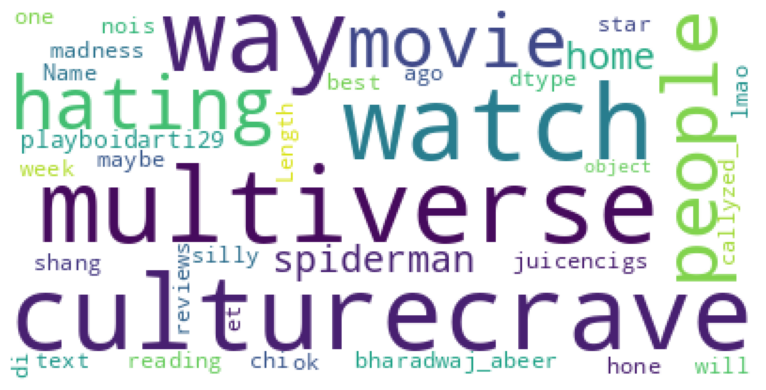

In [6]:
# create word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


stopwords = set(STOPWORDS)
stopwords.add('thor')
stopwords.add('love')
stopwords.add('thunder')

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    # max_font_size=40,
    # min_font_size=10,
    random_state=42
).generate(str(df['text']))

wordcloud.to_file('./data/wordcloud.png')

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### Sentiment Analysis

In [7]:
# perform sentiment analysis
from textblob import TextBlob


def sentiment_analysis(df):
    df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

df = sentiment_analysis(df)
display(df[['text', 'sentiment']].head())


,text,sentiment
0,why are people hating on thor love and thunder...,0.600000
1,culturecrave thor love and thunder this movie ...,-0.175000
2,culturecrave spiderman no way home multiverse ...,0.250000
3,playboidarti29 juicencigs bharadwaj_abeer nois...,0.500000
4,no way hone multiverse of madness shang chi et...,0.166667


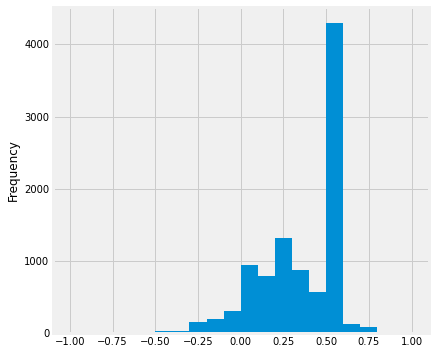

In [8]:
# create sentiment graph
df['sentiment'].plot(kind='hist', bins=20, figsize=(6, 6))
plt.show()


In [10]:
# perform sentiment analysis using transformers
from transformers import pipeline


sentiment_analysis = pipeline("sentiment-analysis")

# apply sentiment analysis
df['sentiment'] = df['text'].apply(lambda x: sentiment_analysis(x))

display(df[['text', 'sentiment']].head())


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are 

In [ ]:
# create sentiment graph
df['sentiment'].plot(kind='hist', bins=20, figsize=(6, 6))
plt.show()
